In [15]:
%matplotlib notebook
"""Script to plot contour lines of bbob-constrained test functions in 2D
"""
import cocoex
import numpy as np
import matplotlib.pyplot as pp
from statsmodels.distributions.empirical_distribution import ECDF

In [16]:
function = 48
dimension = 2
instance = 1
xmin, ymin = -5, -5
xmax, ymax = 5, 5

In [17]:
def bbob_constrained_evaluate_grid(x, y, problem):
    """Evaluate objective and constraint functions of problem
    on the grid whose x-axis is x and y-axis is y
    Result:
    f_values: array of shape (nx, ny)
    cons_values: array of shape (ny, nx, problem.number_of_constraints)
    """
    f_values = []
    cons_values = []
    for yy in y:
        # For each element xx, yy of x, y respectively,
        # evaluate objective and constraints on each point (xx, yy)
        
        # The resulting array must be of size (ny, xy)
        # for ``contour()`` to run correctly
        
        # Evaluating constraints on one point results in an array
        # of size ``problem.number_of_constraints``
        f_values.append([problem([xx, yy]) for xx in x])
        cons_values.append([problem.constraint([xx, yy]) for xx in x])
    return np.array(f_values), np.array(cons_values)

In [18]:
def read_best_parameter(problem):
    """This function reads the best parameter of ``problem''
    from a .txt file and returns a array corresponding to
    this best parameter
    """
    problem._best_parameter(what="print")
    with open("._bbob_problem_best_parameter.txt") as f:
        best_parameter = f.read().strip().split()
    return np.array([float(x) for x in best_parameter])

In [19]:
def bbob_constrained_plot_contours(x, y, f_values, cons_values, x_best, function, dimension, instance):
    """Plot contour lines and best parameter of bbob-constrained
    function ``function``, in ``dimension``D, for instance ``instance``
    """
    # Set color maps for objective
    pp.rcParams['image.cmap'] = 'autumn'
    
    # Plot contours of objective
    pp.contour(x, y, f_values, 50)
    
    # Set color maps for constraints
    pp.rcParams['image.cmap'] = 'winter'
    
    # Plot contours of each constraint
    # To indicate feasible space, positive level sets are filled with color
    for i in range(cons_values.shape[-1]):
        pp.contourf(x, y, np.array(cons_values)[:, :, i], levels=[0, 1e12], alpha=0.4)
        
    # Plot best parameter
    pp.plot(x_best[0], x_best[-1], 'o', c='black', markersize=10)
    
    # Annotate best parameter on the graph
    pp.annotate(r'$x_{opt}$', xy=(x_best[0], x_best[-1]), xytext=(x_best[0]+0.5, x_best[-1]+0.5), size=25)
    
    # Prepare figure settings
    pp.title("Contour lines of f%s, in %sD, instance=%s"%(function, dimension, instance))
    pp.xlabel(r'$x_1$', size=20)
    pp.ylabel(r'$x_2$', size=20)
    pp.axis('equal')
    pp.grid(which ='both')
    #pp.legend()
    pp.show()

In [20]:
def main(function=1, dimension=2, instance=1):
    # Create bbob-constrained test suite
    suite = cocoex.Suite("bbob-constrained", "", "")
    
    # Create the constrained problem of interest
    problem = suite.get_problem_by_function_dimension_instance(function, dimension,
                                                           instance)
    # Read and evaluate best parameter of the problem
    x_best = read_best_parameter(problem)
    f_best = problem(x_best)
    
    # Define x- and y-axes
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    
    # Evaluate objective on grid
    f_values, cons_values = bbob_constrained_evaluate_grid(x, y, problem)
    
    # Plot contours of objective and constraints
    bbob_constrained_plot_contours(x, y, f_values, cons_values, x_best, function, dimension, instance)

<IPython.core.display.Javascript object>


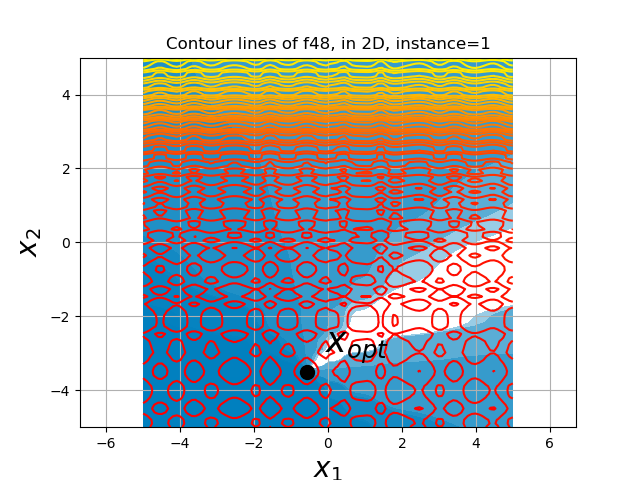

In [21]:
if __name__=='__main__':
    main(function, dimension, instance)